<a href="https://colab.research.google.com/github/ash12hub/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [2]:
import math;

mean = sum(sales)/len(sales);
squareSpread = [];
for i in sales:
  squareSpread.append((i-mean)**2);

variance = sum(squareSpread)/(len(sales)-1);

standardDeviation = math.sqrt(variance)

print("Mean:", mean, "\nVariance:", variance, "\nStandard Deviation:", standardDeviation);

Mean: 3052.714285714286 
Variance: 214387.90476190473 
Standard Deviation: 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import pandas as pd;

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

,Customers,Sales
Customers,290.952381,7604.357143
Sales,7604.357143,214387.904762


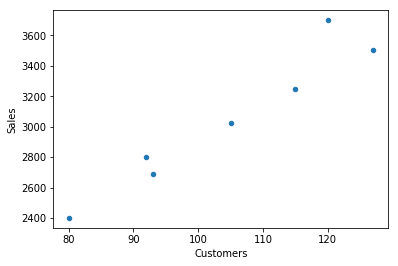

In [5]:
data = {"Customers": customers, "Sales": sales};
df1 = pd.DataFrame(data);
df1.plot.scatter("Customers", "Sales")
cov = df1.cov()
cov

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [6]:
customerMean = sum(customers)/len(customers);

customerSquareSpread = []
for i in customers:
  spread = i-customerMean;
  customerSquareSpread.append(spread**2);

customerVariance = sum(customerSquareSpread)/(len(customers)-1);
customerStd = math.sqrt(customerVariance);
customerStd

17.057326313123664

In [27]:
stdProduct = standardDeviation*customerStd;
corr = cov.copy();
corr.Customers = corr.Customers/stdProduct;
corr.Customers
corr.Sales = corr.Sales/stdProduct;
print(corr, "\n\n", df1.corr());

           Customers      Sales
Customers   0.036839   0.962834
Sales       0.962834  27.144959 

            Customers     Sales
Customers   1.000000  0.962834
Sales       0.962834  1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [28]:
df2 = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")
df2 = df2.set_index(df2.columns[0])
del df2.index.name
df2.head(11)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
6,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY",1
7,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",1
8,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",1
9,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",1
10,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0


In [29]:
df2['survived'] = df2['survived'].replace([1.0, 0.0], [True, False])
df2['has_cabin_number'] = df2['has_cabin_number'].replace([1.0, 0.0], [True, False])
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,True,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",True
2,1.0,True,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",True
3,1.0,False,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",True
4,1.0,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",True
5,1.0,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",True


In [30]:
pclass = df2['pclass'].dropna()
df2['pclass'] = pclass
print(df2['pclass'].tail())
print(pclass.tail())


1306    3.0
1307    3.0
1308    3.0
1309    3.0
1310    NaN
Name: pclass, dtype: float64
1305    3.0
1306    3.0
1307    3.0
1308    3.0
1309    3.0
Name: pclass, dtype: float64


In [31]:
print(df2.survived.value_counts(), "\n")
df3 = df2[df2['boat'].isna() == False]
df3.survived.value_counts()

False    809
True     500
Name: survived, dtype: int64 



True     477
False      9
Name: survived, dtype: int64

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt;

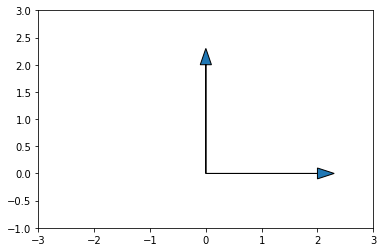

In [33]:
a = [2, 0]
b = [0, 2]

plt.arrow(0, 0, a[0], a[1], head_width=0.2);
plt.arrow(0, 0, b[0], b[1], head_width=0.2);
plt.xlim(-3, 3);
plt.ylim(-1, 3);
plt.show();

Orthogonal can also mean parallel.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
def getDot(a, b):
  if(len(a) == len(b)):
    dot=0;
    length = len(a);
    for i in range(length):
      dot += a[i]*b[i]
    return dot;
  else:
    return;

In [35]:
a = [-5, 3, 7];
b = [6, -8, 2];
dot = getDot(a, b)
dot

-40

The vectors are not orthogonal because their dot product is not equal to zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
import math;
def getNorm(vector):
  sum = 0;
  for i in vector:
    sum += i**2
  return math.sqrt(sum)

In [37]:
import numpy as np;

c = [2, -15, 6, 20]
cNormSquare = getNorm(c)**2;
cDot = getDot(c, c)

cmat = np.array([[2, -15, 6, 20]])
cmatT = cmat.transpose()
ctc = np.matmul(cmat, cmatT)
print(cNormSquare, cDot, "\n\n", ctc)

665.0 665 

 [[665]]


The values are the same.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here
\begin{align}
d = 7 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{align}
\begin{align}
\end{align}
\begin{align}
e = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [38]:
f = [4, 12, 11, 9, 2];
magnitude = getNorm(f);

fUnit = [];
for i in f:
  fUnit.append(1/magnitude*i);

print("Vector:", fUnit, "\nMagnitude:", getNorm(fUnit));

Vector: [0.20908334939572668, 0.62725004818718, 0.5749792108382483, 0.470437536140385, 0.10454167469786334] 
Magnitude: 0.9999999999999999


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

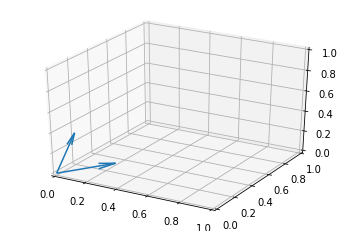

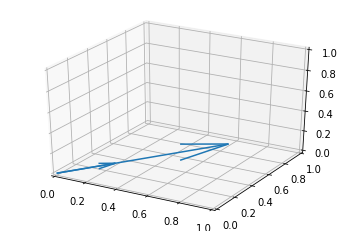

In [39]:
from mpl_toolkits.mplot3d import Axes3D;
vector1 = [[0, 0, 0, .2, .3, .0]]
vector2 = [[0, 0, 0, .0, .2, .3]]
vector3 = [[0, 0, 0, .6, .9, .0]]
X1, Y1, Z1, U1, V1, W1 = zip(*vector1)
X2, Y2, Z2, U2, V2, W2 = zip(*vector2)
X3, Y3, Z3, U3, V3, W3 = zip(*vector3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d');
ax.quiver(X1, Y1, Z1, U1, V1, W1, length=1)
ax.quiver(X2, Y2, Z2, U2, V2, W2, length=1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d');
ax.quiver(X1, Y1, Z1, U1, V1, W1, length=1)
ax.quiver(X3, Y3, Z3, U3, V3, W3, length=1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [40]:
g = [1, 2];
h = [4, 8];
sp = [g[0]+h[0], g[1]+h[1]]
sp

[5, 10]

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [41]:
l = [1, 2, 3];
m = [-1, 0, 7];
n = [4, 8, 2];
sp = [l[0]+m[0]+n[0], l[1]+m[1]+n[1], l[2]+m[2]+n[2]]
sp

[4, 10, 12]

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



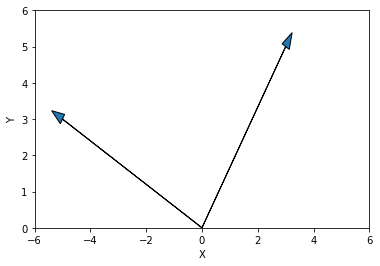

In [42]:
plt.arrow(0, 0, 3, 5, head_width=.3);
plt.arrow(0, 0, -5, 3, head_width=.3);
plt.xlim(-6, 6);
plt.ylim(0, 6);
plt.xlabel("X");
plt.ylabel("Y");
plt.show()

## 6.2 What does it mean to form a basis?

To form a basis is to form Linearly Independent vectors that fill in a vector space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

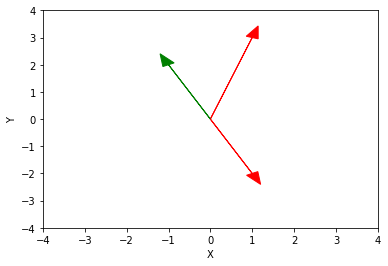

In [43]:
v = [1, 3];
w = [-1, 2];
proj = [1, -2]
plt.arrow(0, 0, v[0], v[1], head_width=.3, color='red');
plt.arrow(0, 0, w[0], w[1], head_width=.3, color='green');
plt.arrow(0, 0, proj[0], proj[1], head_width=.3, color='red');
plt.xlim(-4, 4);
plt.ylim(-4, 4);
plt.xlabel("X");
plt.ylabel("Y");
plt.show();

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

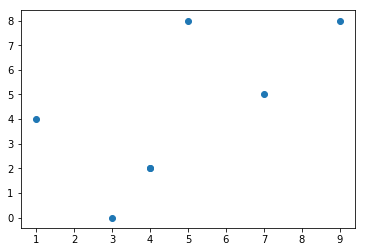

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()

In [0]:
def plot_points(xVector, yVector):
  if(len(xVector) == len(yVector)):
    xy = [];
    for i in range(len(xVector)):
      xy.append([xVector[i], yVector[i]])

    for i in range(len(xy)):
      plotMax = 0;
      if xy[i][0] > xy[i][1]:
        plotMax = xy[i][0]*2;
      else:
        plotMax = xy[i][1]*2;

      #Plot point
      plt.arrow(0, 0, xy[i][0], xy[i][1], color="blue", head_width=plotMax*.05);
      
      #Plot dashed line
      if xy[i][0] < xy[i][1]:
        plt.arrow(xy[i][0], xy[i][1] ,xy[i][1], -xy[i][0], head_width=plotMax*.05, linestyle="--");
      else:
        plt.arrow(xy[i][0], xy[i][1] ,-xy[i][1], xy[i][0], head_width=plotMax*.05, linestyle="--");
        
      #Plot red line
      plt.arrow(0, 0, plotMax, plotMax, color="red");
      
      plt.xlim(0, plotMax)
      plt.ylim(0, plotMax);
      plt.xlabel("X Value");
      plt.ylabel("Y Value");
      plt.show()

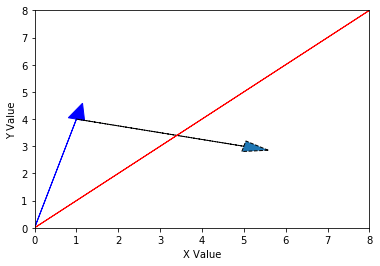

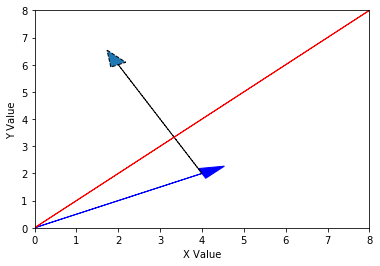

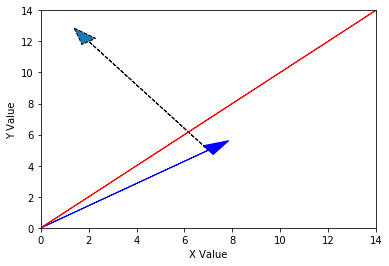

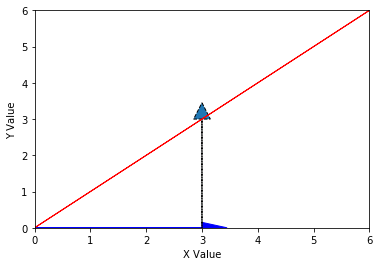

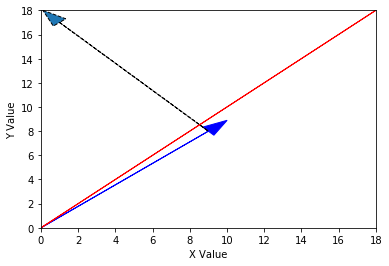

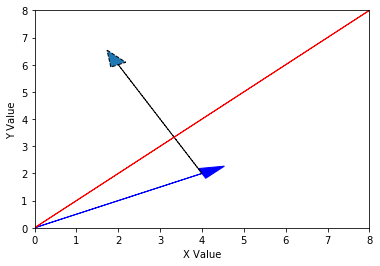

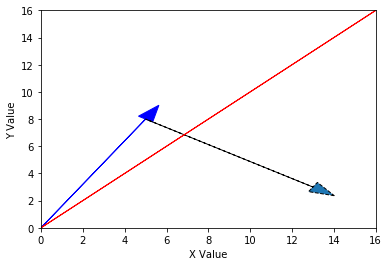

In [90]:
plot_points(x_values, y_values);